In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Sales & Marketing Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,training_ID,trainer_name,training_price,discount_training,training_session,number_of_participant,training_field,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,B0001,Ibun,5500000.0,50,16,19,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,B0002,Reza,6000000.0,50,17,20,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Powerful Closing Technique
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,B0003,Ibun,6000000.0,50,17,18,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Powerful Closing Technique
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,B0004,Reza,6000000.0,50,17,18,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,B0005,Haris,6000000.0,50,17,20,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results


In [3]:
df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_ID", "discount_training", "interest_in_discount_program", "training_price", "total_payment", "brand_sustainability", 
    "training_field", "upselling"
], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   company_field                                5000 non-null   object
 1   level_training_process                       5000 non-null   int64 
 2   purchasing_time_patterns                     5000 non-null   object
 3   number_of_participants                       5000 non-null   int64 
 4   group                                        5000 non-null   object
 5   communication_channel                        5000 non-null   object
 6   complaints                                   5000 non-null   object
 7   communication_quality                        5000 non-null   object
 8   possibility_of_purchasing_the_same_training  5000 non-null   int64 
 9   frequency_engagement                         5000 non-null   int64 
 10  rating_train

In [4]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = MinMaxScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,number_of_participants,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,training_session,number_of_participant,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,trainer_name,training_name,cross_selling
0,1.0,0.684211,0.932584,0.833333,1.00,0.909091,0.947368,4,1,0,1,2,0,1,3,6,3
1,1.0,0.736842,0.921348,0.833333,1.00,1.000000,1.000000,1,1,0,1,2,0,1,6,6,3
2,1.0,0.526316,0.921348,0.541667,0.75,1.000000,0.894737,14,1,0,1,2,0,1,3,6,3
3,1.0,1.000000,0.898876,0.708333,1.00,1.000000,0.894737,12,1,0,1,2,0,1,6,6,3
4,1.0,0.842105,0.977528,0.791667,1.00,1.000000,1.000000,10,1,0,1,2,0,1,2,6,3


In [5]:
X = df2.drop("cross_selling", axis=1)
y = df2["cross_selling"]

pca = PCA()
pca.fit(X)

PCA()

In [6]:
# Tentukan jumlah principal component yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp, cum_var_exp)

[7.49853693e-01 1.09173245e-01 7.22971906e-02 2.89070177e-02
 1.62120702e-02 9.24818425e-03 4.43431991e-03 4.02880004e-03
 2.81455235e-03 1.38606210e-03 8.18264315e-04 2.66395967e-04
 2.41198538e-04 1.79661082e-04 9.51798363e-05 4.41650874e-05] [0.74985369 0.85902694 0.93132413 0.96023115 0.97644322 0.9856914
 0.99012572 0.99415452 0.99696907 0.99835514 0.9991734  0.9994398
 0.99968099 0.99986066 0.99995583 1.        ]


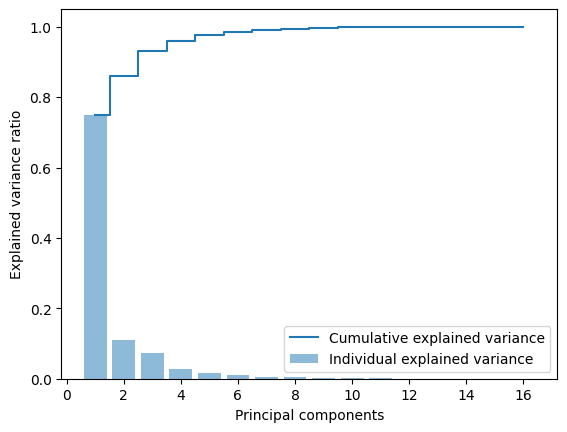

In [7]:
# Tampilkan visualisasi dari hasil PCA dengan warna yang berbeda untuk masing-masing principal component
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [8]:
# Mengambil komponen utama yang paling penting (misalnya, dua komponen pertama)
features = np.array(X.columns)
n_top_components = 10
top_component_indices = np.argsort(np.abs(pca.components_))[:, -n_top_components:]

# Mengambil nama fitur-fitur yang paling penting
top_feature_names = [features[i] for i in top_component_indices]

print("Fitur-fitur yang paling penting:")
for i, feature_set in enumerate(top_feature_names):
    print(f"Komponen Utama {i + 1}: {', '.join(feature_set)}")

Fitur-fitur yang paling penting:
Komponen Utama 1: number_of_participants, possibility_of_purchasing_the_same_training, rating_training, group, number_of_participant, training_session, communication_quality, training_name, trainer_name, company_field
Komponen Utama 2: training_session, level_training_process, group, trainer_name, possibility_of_purchasing_the_same_training, tren_mode_factor, complaints, communication_quality, purchasing_time_patterns, training_name
Komponen Utama 3: possibility_of_purchasing_the_same_training, training_session, communication_quality, tren_mode_factor, level_training_process, group, complaints, training_name, company_field, trainer_name
Komponen Utama 4: communication_channel, possibility_of_purchasing_the_same_training, purchasing_time_patterns, number_of_participant, training_session, level_training_process, tren_mode_factor, group, communication_quality, complaints
Komponen Utama 5: frequency_engagement, possibility_of_purchasing_the_same_training, l

In [9]:
# Temukan jumlah komponen utama yang menjelaskan sebagian besar varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(f'Jumlah komponen utama yang menjelaskan 98% varians: {n_components}')

Jumlah komponen utama yang menjelaskan 98% varians: 6


In [10]:
features = np.array(X.columns)
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(X, y) 

In [11]:
filterr = select.get_support()
features[filterr]

array(['level_training_process',
       'possibility_of_purchasing_the_same_training', 'training_session',
       'purchasing_time_patterns', 'group', 'communication_channel',
       'complaints', 'communication_quality', 'tren_mode_factor',
       'training_name'], dtype=object)

In [12]:
num_features_to_select = 10
# Buat instance PCA
pca = PCA(n_components=num_features_to_select)

# Buat instance SelectKBest dengan uji statistik f_classif (sesuaikan dengan tipe data dan masalah Anda)
select_k_best = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Gabungkan keduanya dalam pipeline
combined_features = FeatureUnion([("pca", pca), ("select_k_best", select_k_best)])

# Buat model akhir (misalnya, classifier) setelah pemilihan fitur
# Di sini, kita tidak menambahkan classifier karena fokus pada pemilihan fitur
# Anda dapat menambahkan classifier sesuai kebutuhan

# Buat pipeline yang menggabungkan seleksi fitur dan model akhir
pipeline = Pipeline([("features", combined_features)])

X_new = pipeline.fit_transform(X, y)

In [13]:
# Setelah Anda memiliki pipeline yang sudah di-fit dan transform (seperti di atas)
# Dapatkan indeks fitur-fitur terbaik dari objek SelectKBest
feature_indices = select_k_best.get_support(indices=True)

# Ambil nama fitur dari dataset asli (misalnya, iris dataset)
selected_feature_names = [features[i] for i in feature_indices]

# Cetak nama-nama fitur yang dipilih
print("Fitur yang dipilih:")
for i, j in enumerate(selected_feature_names):
    print(i+1, j)

Fitur yang dipilih:
1 level_training_process
2 possibility_of_purchasing_the_same_training
3 training_session
4 number_of_participant
5 group
6 communication_channel
7 complaints
8 communication_quality
9 tren_mode_factor
10 training_name


In [14]:
for i in columns:
    if i in df.columns:
        df2[i] = columns[i].inverse_transform(df2[i])

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             

df2.head(5)

,level_training_process,number_of_participants,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,training_session,number_of_participant,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,trainer_name,training_name,cross_selling
0,5.0,14.0,88.0,25.0,5.0,16.0,19.0,Aktivitas Keuangan dan Asuransi,diskon,Group,online,positif,bagus,Ya,Ibun,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
1,5.0,15.0,87.0,25.0,5.0,17.0,20.0,Aktivitas Badan Internasional Dan Badan Ekstra...,diskon,Group,online,positif,bagus,Ya,Reza,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
2,5.0,11.0,87.0,18.0,4.0,17.0,18.0,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",diskon,Group,online,positif,bagus,Ya,Ibun,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
3,5.0,20.0,85.0,22.0,5.0,17.0,18.0,Konstruksi,diskon,Group,online,positif,bagus,Ya,Reza,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
4,5.0,17.0,92.0,24.0,5.0,17.0,20.0,Informasi Dan Komunikasi,diskon,Group,online,positif,bagus,Ya,Haris,Sales Forecasting: for Sales Target Results,Powerful Closing Technique


In [15]:
df_new = df2[selected_feature_names]
df_new["cross_selling"] = df2["cross_selling"]
df_new.head()

C:\Users\DHONI HANIF\AppData\Local\Temp\ipykernel_17640\2945445108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["cross_selling"] = df2["cross_selling"]


,level_training_process,possibility_of_purchasing_the_same_training,training_session,number_of_participant,group,communication_channel,complaints,communication_quality,tren_mode_factor,training_name,cross_selling
0,5.0,88.0,16.0,19.0,Group,online,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
1,5.0,87.0,17.0,20.0,Group,online,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
2,5.0,87.0,17.0,18.0,Group,online,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
3,5.0,85.0,17.0,18.0,Group,online,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique
4,5.0,92.0,17.0,20.0,Group,online,positif,bagus,Ya,Sales Forecasting: for Sales Target Results,Powerful Closing Technique


In [16]:
df_new["cross_selling"].value_counts()

Marketing Research For Business Using SPSS           638
Sales Forecasting: for Sales Target Results          637
Professional Selling Skills                          631
Powerful Closing Technique                           621
Advanced Digital Marketing & Foundation              621
Social Selling: Optimizing Engagement                620
Presentation & Selling Skills Using Story-Telling    619
Optimizing in Growing Your Business                  613
Name: cross_selling, dtype: int64